<a href="https://colab.research.google.com/github/jsdhami/Python-For-Research/blob/main/Physics_Exp_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exp. No.16: TO STUDY THE CHARACTERISTICS OF GM COUNTER AND IT'S RELIABILITY.**

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jsdhami/Python-For-Research/mainData/PhysicsExp16.csv')
bg_r = 6;
df = pd.DataFrame({
    'x': df['x']-bg_r,
    'f': df['f']
})
print(df.head())


    x    f
0  84  1.0
1  85  NaN
2  86  1.0
3  87  NaN
4  88  2.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       51 non-null     int64  
 1   f       47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 944.0 bytes
None


In [ ]:
df.dropna(inplace = True)
df = df[df.f != 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 4 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       37 non-null     int64  
 1   f       37 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 888.0 bytes


In [ ]:
# To Find λ (Where, λ is mean)
N = df.f.sum()
print("Total No of Observation =", N)
λ = ((df.f * df.x).sum()/N)
print("Value of Σfx/N =", λ)

# Calculating the Poisson's distribution frequency
def p_f(x, λ, N):
  return (N*λ**x*np.exp(-λ))/math.factorial(x)

# add new column
df['p_f'] = df['x'].apply(lambda x: p_f(x, λ, N))

print(df.head())

Total No of Observation = 192.0
Value of Σfx/N = 108.44791666666667
    x    f       p_f
4  88  2.0  1.037846
5  89  3.0  1.264632
7  91  2.0  1.816029
8  92  2.0  2.140701
9  93  2.0  2.496286


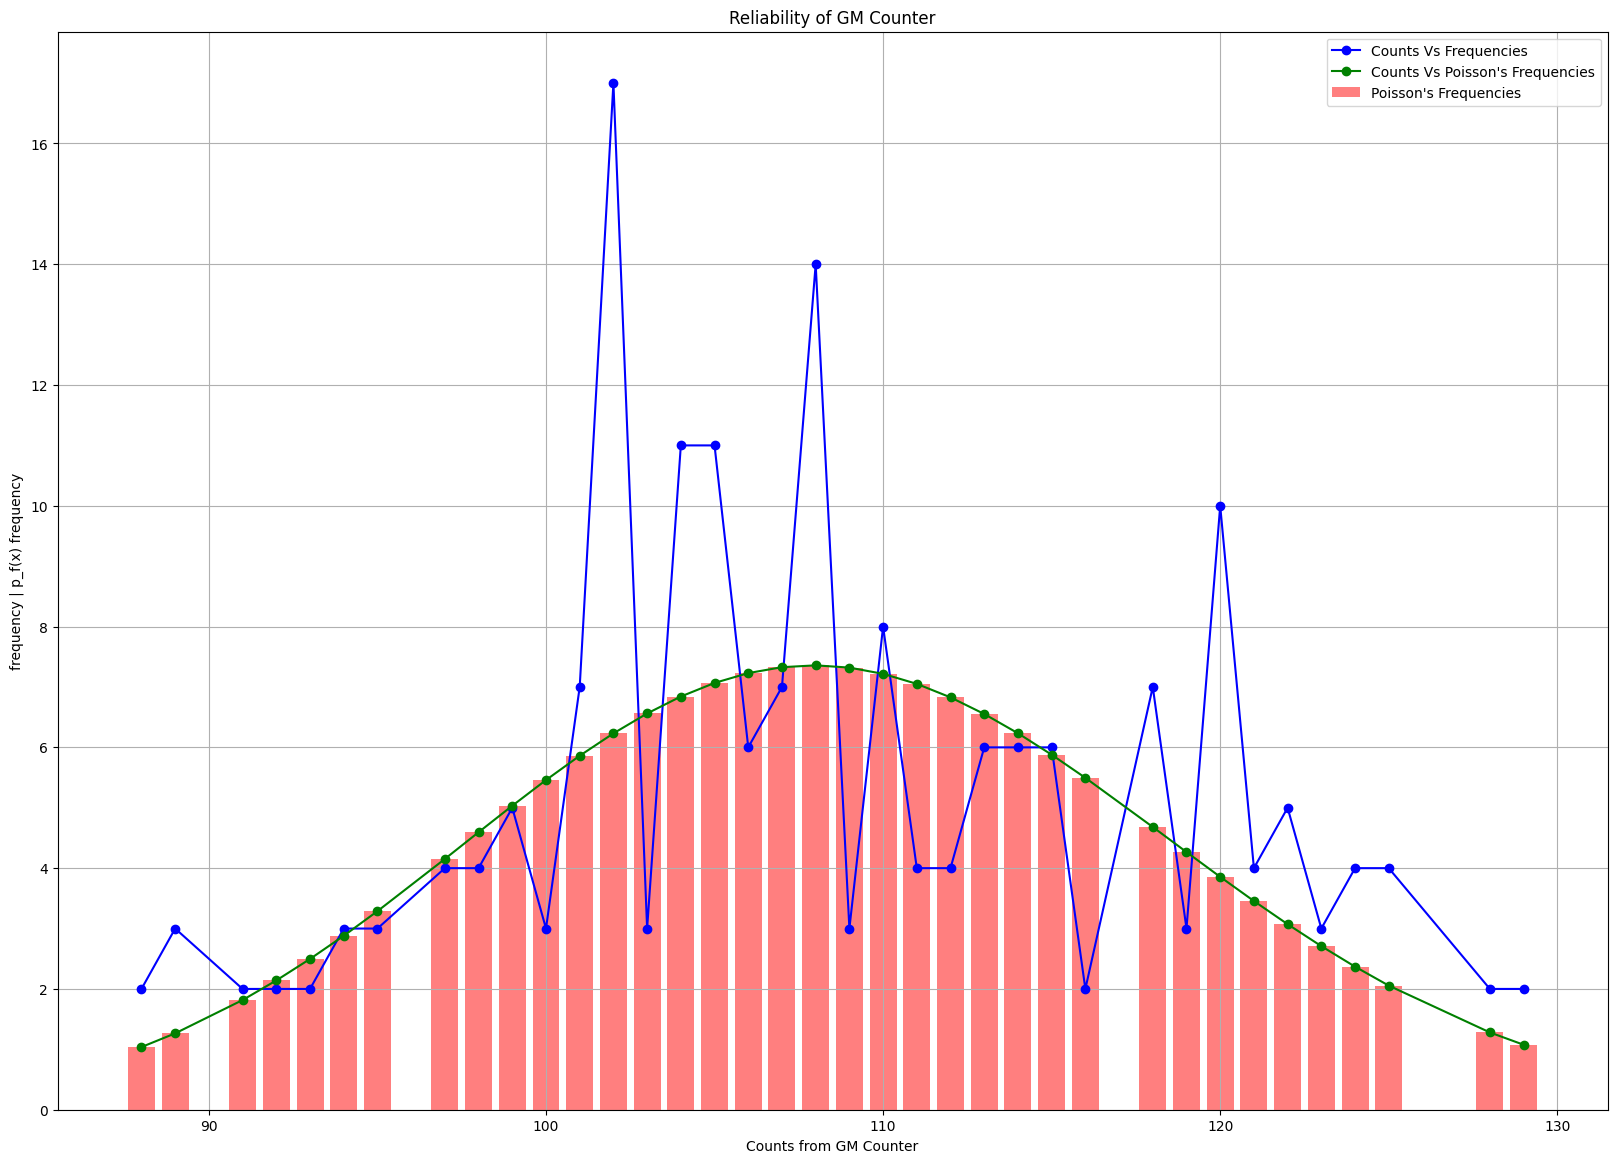

In [ ]:
# pot
fig, ax = plt.subplots()
fig.set_size_inches(20, 14)
ax.plot(df.x, df.f, 'o-', label = 'Counts Vs Frequencies', color='blue')
ax.plot(df.x, df.p_f, 'o-', label = 'Counts Vs Poisson\'s Frequencies', color='green')
ax.bar(df.x, df.p_f, label = 'Poisson\'s Frequencies', color='red', alpha=.5)
ax.set_xlabel('Counts from GM Counter')
ax.set_ylabel('frequency | p_f(x) frequency')
ax.set_title('Reliability of GM Counter')
ax.grid()
ax.legend()
plt.show()